# INTA-6450: Analyzing Enron Email Data


***[Enron Email Dataset](https://www.kaggle.com/datasets/wcukierski/enron-email-dataset)***

# 1. Importing cleaned data processed in processed_emails.ipynb

In [29]:
import pandas as pd

# Importing data
main = pd.read_csv('../../data/processed_emails.csv',index_col=False)
main.replace(to_replace='NaN', value=None, inplace=True)
main.drop(['message', 'file'], axis = 1, inplace=True)

# Turning date strings int datetime objects
from datetime import datetime

main['date'] = pd.to_datetime(main['date'])

main.head()

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_57273/2525220076.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main['date'] = pd.to_datetime(main['date'])


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


## Timeline of the Enron Scandal 
***References***
- [CNN Article](https://www.investopedia.com/terms/e/enron.asp)
- [Lecture Notes](https://gatech.instructure.com/courses/402332/pages/module-9-lecture-pdfs?module_item_id=4157322)

***Notable Times***
- 1990 - Jeffrey Skilling hired
- August 2000 -  Enron's stock price peaked at $90.75
- February 2001 - Skilling becomes CEO, Kenneth Lay becomes chairman
- August 2001 - Skilling resigns as CEO, Kenneth Lay takes over, Sherron Watkins confronts Lay about accounting practices
- October 2001 - Enron announces $638M Q3 loss and $1.2B write down of equity; SEC launches investigation into finances
- November 2001 - Enron stock falls below $1
- December 2001 - Enron files for bankruptcy

In [80]:
import matplotlib.pyplot as plt

def bar_chart (Series: pd.Series, x_label: str, y_label: str, title: str):
    year_counts_dict = Series.to_dict()
    x = [str(i)[:4] for i in year_counts_dict.keys()]
    y = [i for i in year_counts_dict.values()]
    plt.figure(figsize=(10, 6))
    plt.bar(x,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.savefig(f'../../figures/{title.lower().replace(" ", "_")}.png')
    plt.show()



def get_year(Series: pd.Series):
    result = pd.Series(index=Series.index)
    for row, date_obj in enumerate(Series):
        result[row] = int(date_obj.year)
    return result

main['year'] = get_year(main['date'])
main = main[main['year'] <= 2005]


year
1979.0       522
1986.0         2
1997.0       437
1998.0       177
1999.0     11144
2000.0    196101
2001.0    272996
2002.0     35901
2004.0        70
2005.0         1
dtype: int64

year
1979.0       522
1986.0         2
1997.0       437
1998.0       177
1999.0     11144
2000.0    196101
2001.0    272996
2002.0     35901
2004.0        70
2005.0         1
dtype: int64


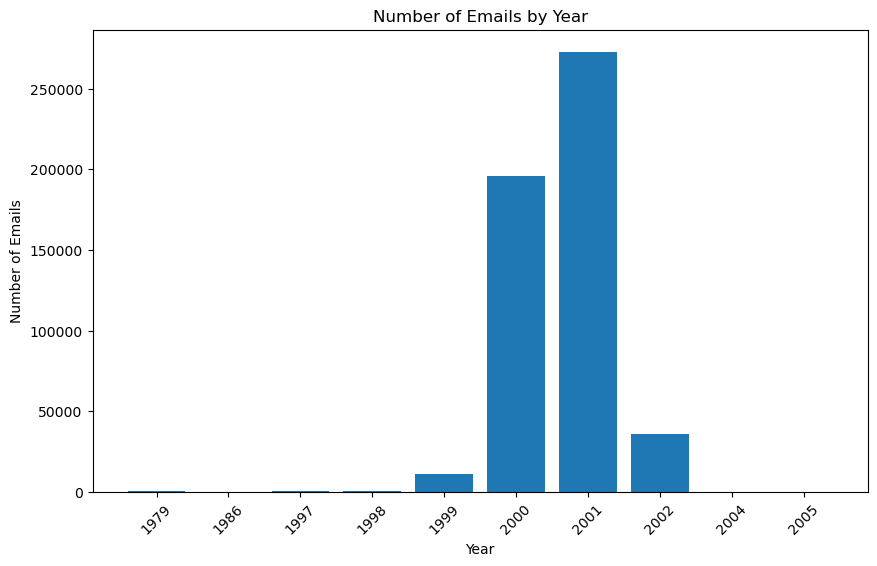

In [83]:
# Determining Emails per Year
year_counts = main.groupby('year').size()
print(year_counts) 

bar_chart(year_counts, 'Year', 'Number of Emails', 'Number of Emails by Year')

## Partitioning Strategy
***Chunk email corpus into dateranges of interest***
- A. 1979 - 1999 - Around 12k, emails, can be analyzed in entirety
- B. 2000 - Large amount of emails, can be analyzed in quarters.
    - What  happened leading up to the stock price peak in August?
- C. 2001 - Large amount of emails, can be analyzed in quarters.
    - Assess CEO changes in February and August
    - October: Q3 Loss anouncement
    - November: Stock Crash
    - December: Filed for bankruptcy
- D. 2002 - Around 35k emails, can be analyzed in two parts.


## Making Subsets of Main Dataframe

#### Pre-Stock Peak P1 (Start-1995)

In [41]:
psp_p1 = main[main['date'] < pd.to_datetime('1996-01-01 00:00:00-07:00')]

psp_p1



,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
664,How is your racing going? What category are y...,phillip.allen@enron.com,muller@thedoghousemail.com,NaN,NaN,Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
698,EOL report for TV in conference on 33Cash -Heh...,phillip.allen@enron.com,"stephen.harrington@enron.com, mary@enron.com",NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
715,"Jeff, I want to bid $2.8 for sagewood with a r...",phillip.allen@enron.com,jsmith@austintx.com,NaN,NaN,Re: MISSION SOUTH,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
716,X-FileName: pallen.nsfattached is the systems ...,phillip.allen@enron.com,"john.lavorato@enron.com, beth.perlman@enron.co...","X-To: John J Lavorato, Beth Perlman, Hunter S ...",X-cc:,"\tscott.neal@enron.com, thomas.martin@enron.co...",X-bcc:,1979-12-31 16:00:00-08:00
842,"Mary, It is OK to buy a carpet shampooer. Abou...",phillip.allen@enron.com,maryrichards7@hotmail.com,NaN,NaN,Re:,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
...,...,...,...,...,...,...,...,...
508499,Ed & Tracy -Jennifer Shipos is a gas trader on...,jason.williams@enron.com,"edward.sacks@enron.com, tracy.ngo@enron.com",NaN,NaN,Praxair,\Jason_Williams_Nov2001\Notes Folders\Discussi...,1979-12-31 16:00:00-08:00
508504,"Andrew -Thanks for your kind words, my friend....",jason.williams@enron.com,thedolan@yahoo.com,NaN,NaN,Re: Bliss,\Jason_Williams_Nov2001\Notes Folders\Discussi...,1979-12-31 16:00:00-08:00
508505,All -Attached is an ISDA worksheet for a new a...,jason.williams@enron.com,"susan.bailey@enron.com, samantha.boyd@enron.co...",NaN,NaN,"Praxair, Inc.",\Jason_Williams_Nov2001\Notes Folders\Discussi...,1979-12-31 16:00:00-08:00
508509,Derek -Trade QP0373.1 was booked to Johns Manv...,jason.williams@enron.com,derek.bailey@enron.com,NaN,NaN,Johns Manville,\Jason_Williams_Nov2001\Notes Folders\Discussi...,1979-12-31 16:00:00-08:00


#### Pre-Stock Peak P2 (1996 -August 2000)

In [43]:
psp_p2 = main[main['date'] < pd.to_datetime('2000-09-01 00:00:00-07:00')]
psp_p2 = psp_p2[psp_p2['date'] >= pd.to_datetime('1996-01-01 00:00:00-07:00')]
psp_p2.reset_index(drop=True, inplace=True)

psp_p2


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00
1,"Greg, How about either next Tuesday or Thursda...",phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 04:17:00-07:00
2,Please cc the following distribution list with...,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-22 07:44:00-07:00
3,any morning between 10 and 11:30,phillip.allen@enron.com,joyce.teixeira@enron.com,NaN,NaN,Re: PRC review - phone calls,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-07-14 06:59:00-07:00
4,"Richard, Compare your california production to...",phillip.allen@enron.com,rich@pira.com,NaN,NaN,Re: Western Gas Market Report -- Draft,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 07:36:00-07:00
...,...,...,...,...,...,...,...,...
99311,"Jay,Yes he is. I'll get something scheduled.L...",liz.taylor@enron.com,rajelpy@aol.com,NaN,NaN,Re: Houston next week - Jay Perl,\Lawrence_Whalley_Dec2000\Notes Folders\Sent,2000-08-10 07:17:00-07:00
99312,Greg Whalley will be in attendance. The Net ...,liz.taylor@enron.com,vanessa.groscrand@enron.com,NaN,NaN,Re: Enron Advisory Council meeting,\Lawrence_Whalley_Dec2000\Notes Folders\Sent,2000-08-10 06:56:00-07:00
99313,"jeff.johnson@enron.com, allan.severude@enron.c...",liz.taylor@enron.com,"john.pavetto@enron.com, allan.sommer@enron.com...","\tderryl.cleaveland@enron.com, john.simmons@en...","\tellen.fowler@enron.com, stephen.horn@enron.c...","\tkeith.dziadek@enron.com, jenny.rub@enron.com...","\trobert.jones@enron.com, tommy.yanowski@enron...",2000-08-07 09:04:00-07:00
99314,"John,Thank you for your interest in one of my ...",kwright@momentumcars.com,john.zufferli@enron.com,NaN,NaN,momentum motor cars,\John_Zufferlie_Dec2000\Notes Folders\All docu...,2000-05-04 11:10:00-07:00


In [25]:
df_filtered = main[main['date'].dt.year < 2005]

AttributeError: Can only use .dt accessor with datetimelike values

***Getting Emails from Enron executives***

In [58]:
# From initial analysis of the data we can see the convention of email addresses is {firstname}.{lastname}@enron.com

#Getting emails sent by executives with known involvement in the scandal
executives = ["jeff.skilling@enron.com", "kenneth.lay@enron.com", "andrew.fastow@enron.com"] #F

exec_emails = main[main['sender'].isin(executives)]


In [59]:
exec_emails

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
19062,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
19856,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
39106,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
39117,"jim.fallon@enron.com, andrew.fastow@enron.com,...",kenneth.lay@enron.com,"k..allen@enron.com, sally.beck@enron.com, tim....","\tdavid.delainey@enron.com, james.derrick@enro...","\tj..detmering@enron.com, janet.dietrich@enron...","\tjeremy.blachman@enron.com, raymond.bowen@enr...","\trich.dimichele@enron.com, keith.dodson@enron...",2001-08-25 13:28:04-07:00
154241,"fyi-----Original Message-----From: Oxley, Bink...",kenneth.lay@enron.com,e..haedicke@enron.com,NaN,NaN,FW: dynergy planned for merger to fail all along,"\Mark_Haedic_Jan2002\Haedicke, Mark E.\Inbox",2001-12-02 15:23:13-08:00
...,...,...,...,...,...,...,...,...
477184,"anthony_duenner@enron.net, john.echols@enron.c...",jeff.skilling@enron.com,"joao.carlos.albuquerque@enron.com, ray.alvarez...","\tccalger@enron.com, eduardo.camara@enron.com,","\trebecca.carter@enron.com, daniel.castagnola@...","\tsami.arap@enron.com, sergio.assad@enron.com,","\tckchew@enron.com, rick.craig@enron.com, greg...",2001-05-03 08:06:00-07:00
481690,"anthony_duenner@enron.net, john.echols@enron.c...",jeff.skilling@enron.com,"joao.carlos.albuquerque@enron.com, ray.alvarez...","\tccalger@enron.com, eduardo.camara@enron.com,","\trebecca.carter@enron.com, daniel.castagnola@...","\tsami.arap@enron.com, sergio.assad@enron.com,","\tckchew@enron.com, rick.craig@enron.com, greg...",2001-05-03 08:06:00-07:00
497284,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
499645,"X-Folder: \GWHALLE (Non-Privileged)\Whalley, G...",kenneth.lay@enron.com,"mark.koenig@enron.com, j..kean@enron.com, pr <...",Content-Transfer-Encoding: 7bit,"X-From: Lay, Kenneth </O=ENRON/OU=NA/CN=RECIPI...","\tjames.derrick@enron.com, elizabeth.tilney@en...","X-To: Koenig, Mark </O=ENRON/OU=NA/CN=RECIPIEN...",2001-11-02 09:51:21-08:00


In [60]:
# Defining keywords to find initial group of emails with evidence of wrongdoing

keywords = ['failure', 'fail', 'SPE', 'Raptor', 'Chewco', 'profit', 'confidential','risk','problem','concern' ]

wrongdoing_emails = exec_emails[exec_emails['text'].str.contains('|'.join(keywords), case=False)].reset_index(drop=True)

wrongdoing_emails.head()



,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
1,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
2,"gabriel.chavez@enron.com, will.chen@enron.com,...",kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...","\tmara.bronstein@enron.com, samantha.bryce@enr...","\tbali.bukenya@enron.com, bart.burk@enron.com,","\thector.alviar@enron.com, chuck.ames@enron.com,","\tcatalina.cardenas@enron.com, tobin.carlson@e...",2001-08-23 11:24:25-07:00
3,"fyi-----Original Message-----From: Oxley, Bink...",kenneth.lay@enron.com,e..haedicke@enron.com,NaN,NaN,FW: dynergy planned for merger to fail all along,"\Mark_Haedic_Jan2002\Haedicke, Mark E.\Inbox",2001-12-02 15:23:13-08:00
4,I don't want to show this one to Ken. This gu...,kenneth.lay@enron.com,"j..kean@enron.com, john.brindle@enron.com",NaN,NaN,FW: Salary,"\SKEAN (Non-Privileged)\Kean, Steven J.\Inbox",2001-10-29 13:41:15-08:00


In [61]:
print(wrongdoing_emails['text'][4])

I don't want to show this one to Ken.  This guy sounds really angry, though, and wants Ken to write him back.Rosie -----Original Message-----From: 	"scott hendrickson" <scotth1965@hotmail.com>@ENRON  Sent:	Monday, October 29, 2001 2:44 PMTo:	Lay, KennethSubject:	SalaryDear Mr. Lay ---As a recently terminated employee of Enron, I have watched the stock'sdramatic tumble in the last weeks mount on top of the horrible performanceover the last months.  As Chairman and CEO, you are ultimately responsiblefor everything that goes on in the company.  Without getting into thepotentially criminal and certainly ill-conceived activities of you and otherEnron executives, past and present, I think you have done little but pay lipservice in order to correct things.Mr. Lay, you and the other executives receive very large salaries.  None ofyou is hurting for money.  I think it unconscionable that you and otherexecutives continue to draw a paycheck.  While employees and others like mehave seen our net wo

In [65]:

wrongdoing_emails['recipients'] = ""
edges = []
for _,row in wrongdoing_emails.iterrows():
    recipient_2 = []
    recipient_3 = []
    recipient_1 = row['reciient1'] = row['recipient1'].replace(' ', '').split(',')
    if row['recipient2'] != "NaN" and type(row['recipient2']) == str:
        recipient_2 = row['recipient2'] = row['recipient2'].replace(' ', '').split(',')
    elif row['recipient3'] != "NaN" and type(row['recipient3']) == str:
        recipient_3 = row['recipient3'] = row['recipient3'].replace(' ', '').split(',')
    recipients = recipient_1 + recipient_2 + recipient_3
    for i in recipients:
        if i != '':
            edges.append((row['sender'], i))


edges


[('kenneth.lay@enron.com', 'erica.adams@enron.com'),
 ('kenneth.lay@enron.com', 'john.addison@enron.com'),
 ('kenneth.lay@enron.com', 'matthew.almy@enron.com'),
 ('kenneth.lay@enron.com', '\tmara.bronstein@enron.com'),
 ('kenneth.lay@enron.com', 'samantha.bryce@enron.com'),
 ('kenneth.lay@enron.com', 'erica.adams@enron.com'),
 ('kenneth.lay@enron.com', 'john.addison@enron.com'),
 ('kenneth.lay@enron.com', 'matthew.almy@enron.com'),
 ('kenneth.lay@enron.com', '\tmara.bronstein@enron.com'),
 ('kenneth.lay@enron.com', 'samantha.bryce@enron.com'),
 ('kenneth.lay@enron.com', 'erica.adams@enron.com'),
 ('kenneth.lay@enron.com', 'john.addison@enron.com'),
 ('kenneth.lay@enron.com', 'matthew.almy@enron.com'),
 ('kenneth.lay@enron.com', '\tmara.bronstein@enron.com'),
 ('kenneth.lay@enron.com', 'samantha.bryce@enron.com'),
 ('kenneth.lay@enron.com', 'e..haedicke@enron.com'),
 ('kenneth.lay@enron.com', 'j..kean@enron.com'),
 ('kenneth.lay@enron.com', 'john.brindle@enron.com'),
 ('andrew.fastow@en

### Network Analysis of Enron Email Dataset

/opt/anaconda3/envs/enron/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


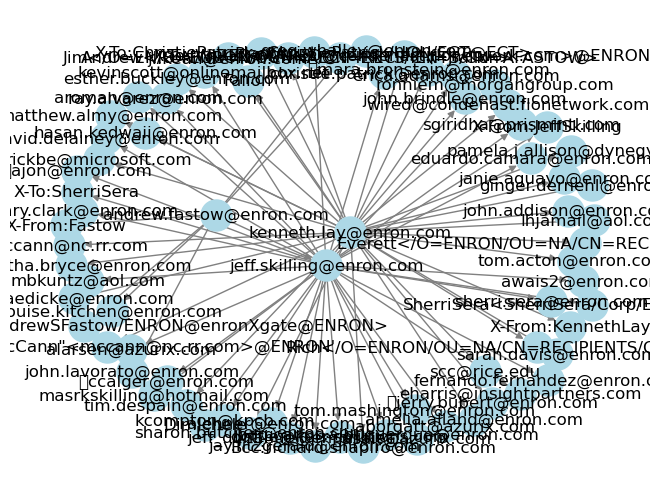

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw the network
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', arrowsize=10)
plt.show()